<a href="https://colab.research.google.com/github/aleksejalex/expert-octo-eureka/blob/main/RADcv_Assignment_3_Gaj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. zápočtová úloha z 01RAD

## Popis úlohy

Datový soubor vychází z datasetu \texttt{House Sales in King County, USA}, který je k nalezení například na kaggle.com, nebo v knihovně \texttt{library(moderndive)} data \texttt{house\_prices}.
Původní dataset obsahuje prodejní ceny domů v oblasti King County, která obsahuje i město Seattle, a data byla nasbírána mezi květnem 2014 a květnem 2015. Pro naše potřeby bylo z datasetu vypuštěno jak několik proměnných, také byl dataset výrazně osekán a lehce modifikován.

Dále byl dataset již dopředu rozdělen na tři části, které všechny postupně v rámci 3. zápočtové úlohy využijete.


In [146]:
#library(tidyverse)

In [147]:
#house_rad <- read.table("https://raw.githubusercontent.com/francji1/01RAD/main/data/01RAD2022_house.csv",header=TRUE,sep=",")
#head(house_rad)

Data celkem obsahují  následujících 18 proměnných, přičemž naším cílem je prozkoumat vliv 12 z nich na cenu nemovitostí   * price}. Přičemž anglický popis jednotlivých proměnných (sloupců) je následující:

Feature & Description
 
  * id  : Our notation for a house  
 
  * price  : Price is prediction target  
 
  * bedrooms  : Number of Bedrooms/House  
 
  * bathrooms  : Number of Bathrooms/Bedrooms  
 
  * sqft\_living  : Square footage of the home  
 
  * sqft\_lot  : Square footage of the lot   
 
  * floors  :  Total floors (levels) in house 
 
  * waterfront  : House which has a view to a waterfront   
 
  * view  : Has been viewed  
 
  * condition  : How good the condition is Overall  
 
  * grade  : Overall grade given to the housing unit 
 
  * sqft\_above  : Square footage of house apart from basement   
 
  * sqft\_basement  : Square footage of the basement   
 
  * yr\_built  : Built Year   
 
  * yr\_renovated  : Year when house was renovated  
 
  * sqft\_living15  : Living room area in 2015 (implies– some renovations) 
 
  * sqft\_lot15  : lotSize area in 2015 (implies– some renovations)  
 
  * split  : Splitting variable with train, test and validation sample  


## Podmínky a body

Úkol i protokol vypracujte samostatně. Pokud na řešení nějaké úlohy budete přesto s někým spolupracovat, radit se, nezapomeňte to u odpovědi na danou otázku uvést. Tato zápočtová úloha obsahuje 10 otázek po 1 bodu. Celkem za 3 zápočtové úlohy bude možné získat 30 bodů, přičemž pro získání zápočtu je potřeba 20. Další dodatečné body mohu případně individuálně udělit za řešení mini domácích úkolů z jednotlivých hodin.

## Odevzdání

Protokol ve formátu pdf (včetně příslušného Rmd souboru) odevzdejte prostřednictvím MS Teams, nejpozději do 12:00 dne 5. 1. 2023.


In [148]:
# importy balicku
import inspect
import numpy as np
import scipy as scp
import pandas as pd
import seaborn as sbn
import csv
import matplotlib as mpt
import statsmodels
import statsmodels.formula.api as sm
from matplotlib import pyplot as plt



def retrieve_name(var):
    "vrati nazev promenne jako string"
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

examplevarr = 4
print(examplevarr)
print(retrieve_name(examplevarr))

def gauss(x, mi, sigma2):
    "hustota normalniho rozdeleni. x je bud cislo nebo np.array"
    return (1/(np.sqrt(2*np.pi*sigma2)) * np.exp (-  ( (x-mi)**2 ) / (2*sigma2) ) )


4
['examplevarr']


In [149]:
# additional settings for plotting images:
plt.rcParams.update({"figure.dpi": 130})   # increase DPI, default = 96
#%config InlineBackend.figure_format = "svg"  # every plot (matplotlib's or seaborn's) must be a SVG image

In [150]:
# import datasetu (pomoci Pandas)
# (puvodne dataset byl stazen z >>    )
url = "https://raw.githubusercontent.com/francji1/01RAD/main/data/01RAD2022_house.csv"
imported_data = pd.read_csv(url)

imported_data
#data.info

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,split
0,1,1,2395000.0,4,3.25,3800,19798,2.0,0,0,3,10,3800,0,1969,2009,3940,18975,train
1,2,2,679000.0,3,2.50,2770,9350,2.0,0,3,3,8,2770,0,1957,2000,2660,9695,train
2,3,3,664000.0,2,1.75,1720,5785,1.0,0,0,3,6,860,860,1948,2002,1680,5184,train
3,4,4,915000.0,5,2.50,2750,5589,1.5,0,0,5,9,1840,910,1910,0,1460,4250,train
4,5,5,450000.0,5,2.50,2850,209523,1.0,0,0,4,7,1930,920,1925,1968,2220,209523,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1996,512031.0,3,1.75,1540,3000,1.0,0,2,3,7,770,770,1920,0,1420,4200,validation
1996,1997,1997,270000.0,4,2.50,1660,8063,1.0,0,0,4,7,1660,0,1978,0,1060,8437,validation
1997,1998,1998,875000.0,3,2.50,1690,10592,1.0,0,0,3,8,1690,0,1973,2009,2260,9945,validation
1998,1999,1999,415000.0,2,1.00,880,4558,1.0,0,0,3,7,880,0,1951,0,1370,5243,validation


## Průzkumová a grafická část:

* Otázka 01

  Ověřte rozměry datového souboru, typy jednotlivých proměnných,  a shrňte základní popisné charakteristiky všech proměnných. Vykreslete histogram a odhad hustoty pro odezvu   * price}, dá se z toho již něco odvozovat pro budoucí analýzu?
  
  \

In [151]:
# zakladni charakteristiky
imported_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2000 non-null   int64  
 1   id             2000 non-null   int64  
 2   price          2000 non-null   float64
 3   bedrooms       2000 non-null   int64  
 4   bathrooms      2000 non-null   float64
 5   sqft_living    2000 non-null   int64  
 6   sqft_lot       2000 non-null   int64  
 7   floors         2000 non-null   float64
 8   waterfront     2000 non-null   int64  
 9   view           2000 non-null   int64  
 10  condition      2000 non-null   int64  
 11  grade          2000 non-null   int64  
 12  sqft_above     2000 non-null   int64  
 13  sqft_basement  2000 non-null   int64  
 14  yr_built       2000 non-null   int64  
 15  yr_renovated   2000 non-null   int64  
 16  sqft_living15  2000 non-null   int64  
 17  sqft_lot15     2000 non-null   int64  
 18  split   

In [152]:
imported_data.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000
mean,1000.500000,1000.500000,6.315752e+05,3.414500,2.179875,2151.140500,16047.752500,1.499000,0.02100,0.368000,3.33400,8.14000,1821.908500,333.741000,1958.034000,879.246000,1966.679000,13062.7490
std,577.494589,577.494589,5.108879e+05,0.864328,0.780853,927.698389,38345.913723,0.517574,0.14342,0.964905,0.62661,8.83133,809.921498,457.855832,30.729904,991.218107,681.426679,25147.8105
min,1.000000,1.000000,8.400000e+04,2.000000,1.000000,105.000000,690.000000,1.000000,0.00000,0.000000,1.00000,4.00000,580.000000,0.000000,1900.000000,0.000000,780.000000,1023.0000
25%,500.750000,500.750000,3.478375e+05,3.000000,1.750000,1490.000000,5040.000000,1.000000,0.00000,0.000000,3.00000,7.00000,1230.000000,0.000000,1936.000000,0.000000,1480.000000,5100.0000
50%,1000.500000,1000.500000,5.015000e+05,3.000000,2.250000,1980.000000,7689.000000,1.500000,0.00000,0.000000,3.00000,7.00000,1650.000000,0.000000,1957.000000,0.000000,1830.000000,7632.0000
75%,1500.250000,1500.250000,7.500000e+05,4.000000,2.500000,2680.000000,11340.500000,2.000000,0.00000,0.000000,4.00000,8.00000,2211.500000,672.500000,1981.000000,1996.000000,2320.000000,10451.0000
max,2000.000000,2000.000000,8.500000e+06,6.000000,4.750000,10040.000000,641203.000000,3.000000,1.00000,4.000000,5.00000,232.00000,7680.000000,2360.000000,2015.000000,2015.000000,5790.000000,310582.0000


In [153]:
# zakladni vizualizace
#sbn.pairplot(imported_data)

In [154]:
#sbn.pairplot(imported_data, hue = "split")

In [155]:
list_of_all_split_values = imported_data.split.to_numpy()

print("Dataset is split into " + str(len(np.unique(list_of_all_split_values))) + " categories:")
print(np.unique(list_of_all_split_values))

print(len(  imported_data[imported_data.split == 'train']  ))
print(len(  imported_data[imported_data.split == 'test']  ))
print(len(  imported_data[imported_data.split == 'validation']  ))

Dataset is split into 3 categories:
['test' 'train' 'validation']
1000
500
500


Dataset je typem `split` rozdělen do tří kategorií train (1000), test (500) a validation (500).





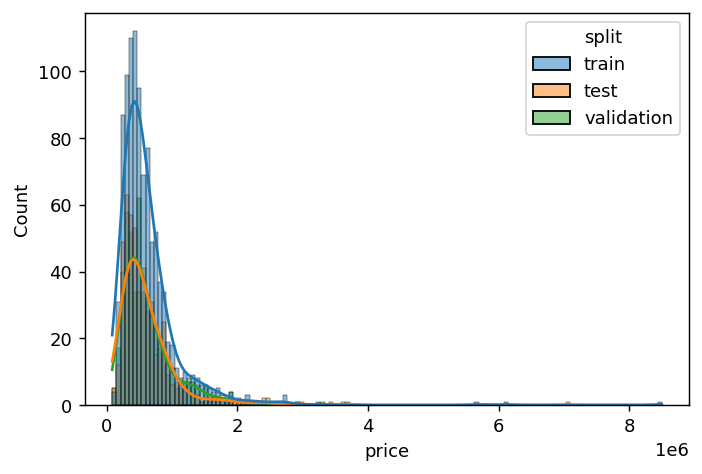

In [156]:
# histogram pro price:
sbn.histplot( x = "price", hue = "split", data = imported_data , kde=True)

Z histogramu pro proměnnou price (buňka výše) je patrné, že by se mohlo vyplatit použít logaritmickou škálu. Zkusme:

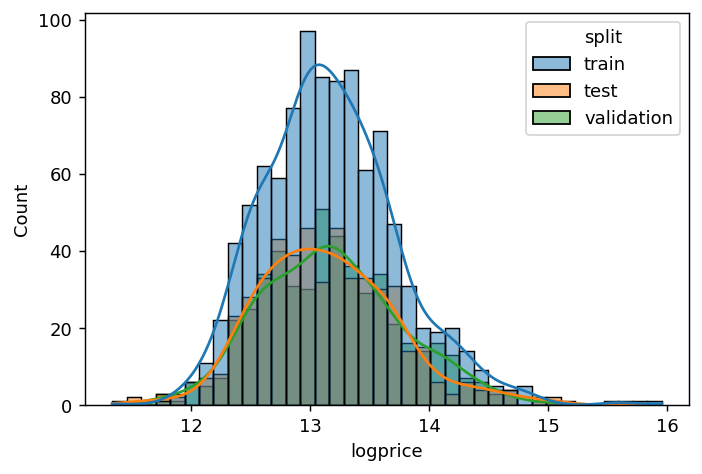

In [157]:
data = imported_data
data['logprice'] = np.log(data.price)

sbn.histplot( x = "logprice", hue = "split", data = data , kde=True)

* Otázka 02

  Jsou všechny proměnné použitelné pro analýzu a predikci ceny nemovitostí? Pokud data obsahují chybějící hodnoty, (případně nesmyslné hodnoty), lze je nějak nahradit (upravit), nebo musíme data odstranit?
  
  \

In [158]:
# kontrola na nan-y
nan_in_data = data.isnull().sum().sum()
print('Number of NaN values in dataframe: ' + str(nan_in_data))

Number of NaN values in dataframe: 0


Jak ukázal kód v buňce výše, dataset neobsahuje žádné hodnoty typu NaN. Pokud by je obsahoval, myslím si, že by bylo vhodné tyto data zahodit (což ostatě vzhledem k velikosti datasetu není nijak nebezpečné). 

Případně (obzvlášť pokud narazíme na nesmyslné hodnoty) bych hledal příčinu, kde se vzaly (způsob sběru dat, způsob zpracování, konkrétní význam atp.). Outliery bez závažného důvodu z datasetu neodstraňujeme.

* Otázka 03
 
  Zkontrolujte pro 4 vybranné proměnné (price, sqft_living, grade, yr_built) bylo-li rozdělení datasetu pomocí proměnné split náhodné. Tj mají zmíněné proměnné ve skupinách train, test a validation přibližně stejné rozdělení?

\

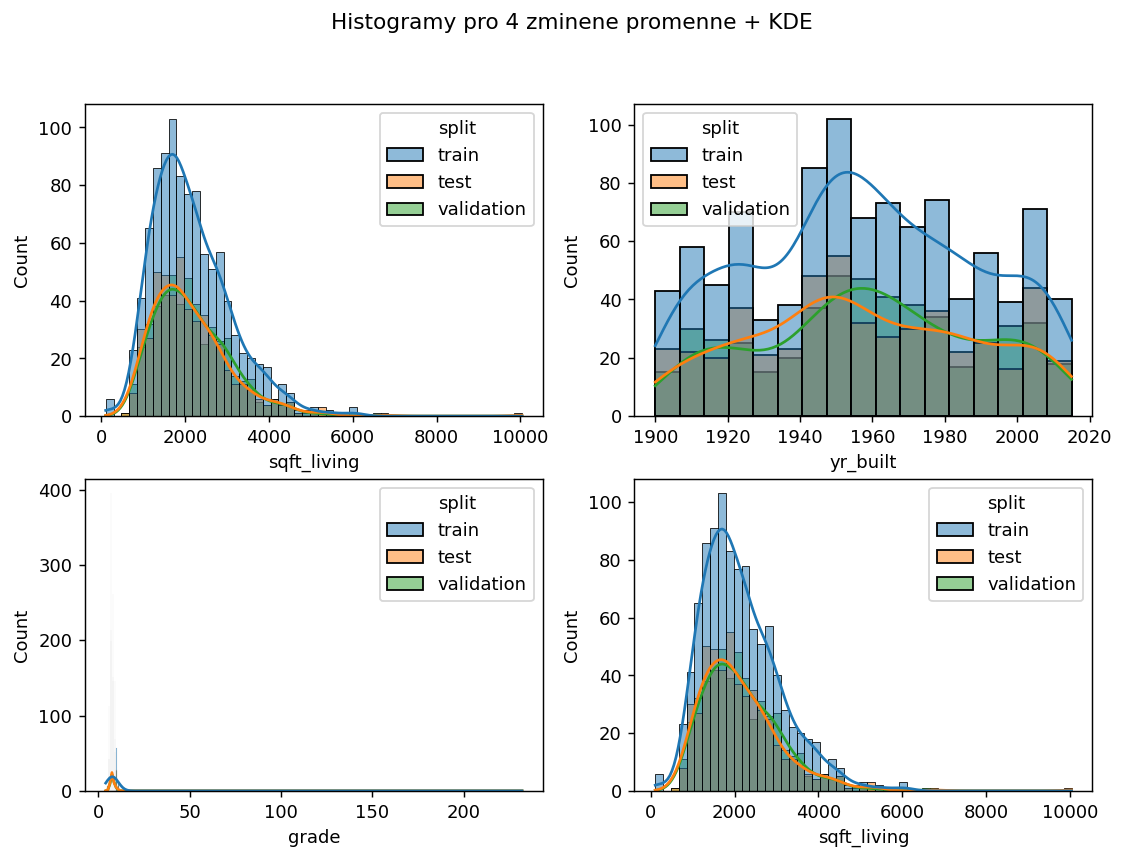

In [159]:
# vykreslit 4 subploty, v kazdem histplot o trech barvach

fig, axs = plt.subplots(2, 2, figsize =(10, 7))
sbn.histplot( x = "sqft_living", hue = "split", data = data , kde=True, ax = axs[0,0])
sbn.histplot( x = "grade", hue = "split", data = data , kde=True, ax = axs[1,0])
sbn.histplot( x = "yr_built", hue = "split", data = data , kde=True, ax = axs[0,1])
sbn.histplot( x = "sqft_living", hue = "split", data = data , kde=True, ax = axs[1,1])

fig.suptitle("Histogramy pro 4 zminene promenne + KDE")
fig.show()

In [160]:
# statistické testy: FOR SQFT_LIVING

#Kruskal-Wallis test 
# H_0: distributions of all samples are equal
# H_1: distributions of some samples are not equal

data1 = data[data["split"] == "train"].sqft_living
data2 = data[data["split"] == "test"].sqft_living
data3 = data[data["split"] == "validation"].sqft_living
stat, p = scp.stats.kruskal(data1, data2, data3)

print(p)
if p > 0.01:
    print("probably same distribution")
else:
    print("probably diferent distributions")


0.5755713998812749
probably same distribution


In [161]:
# statistické testy: FOR PRICE

#Kruskal-Wallis test 
# H_0: distributions of all samples are equal
# H_1: distributions of some samples are not equal

data1 = data[data["split"] == "train"].price
data2 = data[data["split"] == "test"].price
data3 = data[data["split"] == "validation"].price
stat, p = scp.stats.kruskal(data1, data2, data3)

print(p)
if p > 0.01:
    print("probably same distribution")
else:
    print("probably diferent distributions")


0.5377379084570177
probably same distribution


In [162]:
# statistické testy: FOR GRADE

#Kruskal-Wallis test 
# H_0: distributions of all samples are equal
# H_1: distributions of some samples are not equal

data1 = data[data["split"] == "train"].grade
data2 = data[data["split"] == "test"].grade
data3 = data[data["split"] == "validation"].grade
stat, p = scp.stats.kruskal(data1, data2, data3)

print(p)
if p > 0.01:
    print("probably same distribution")
else:
    print("probably diferent distributions")


0.7411913779590033
probably same distribution


In [163]:
# statistické testy: FOR YR_BUILT

#Kruskal-Wallis test 
# H_0: distributions of all samples are equal
# H_1: distributions of some samples are not equal

data1 = data[data["split"] == "train"].yr_built
data2 = data[data["split"] == "test"].yr_built
data3 = data[data["split"] == "validation"].yr_built
stat, p = scp.stats.kruskal(data1, data2, data3)

print(p)
if p > 0.01:
    print("probably same distribution")
else:
    print("probably diferent distributions")


0.557768594703623
probably same distribution


Podle výsledků testů výše lze uzavřít, že proměnné yr_built, price, grade, sqft_living mají podle testu stejné rozdělení (a tedy dataset byl rozdělen správně). 


## Lineární model (použijte pouze trénovací data, tj. split == "train"):

* Otázka 04

  Spočtěte korelace mezi jednotlivými regressory a graficky je znázorněte. Dále spočtěte číso podmmíněnosti matice regresorů Kappa a VIF. Pokud se v datech vyskytuje znatelná multicollinearita, rozhodněte jaké proměnné a proč použijete v následném linárním modelu.


In [164]:
# OLS na vsech dostupnych promennych v datasetu v TRENOVACI sekci (ale bez interakci)
model = sm.ols(formula = "price ~  bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated ", data = data[data.split == "train"])
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     40.13
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           8.31e-82
Time:                        16:25:29   Log-Likelihood:                -14392.
No. Observations:                1000   AIC:                         2.881e+04
Df Residuals:                     986   BIC:                         2.888e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.166e+06   1.24e+06      2.557

0      1.248955e+06
1     -2.318466e+05
2      3.023483e+05
3     -1.252109e+05
4     -1.310602e+05
           ...     
995    8.511173e+04
996   -2.191608e+05
997    1.969969e+05
998    1.006219e+05
999    5.236813e+05
Length: 1000, dtype: float64


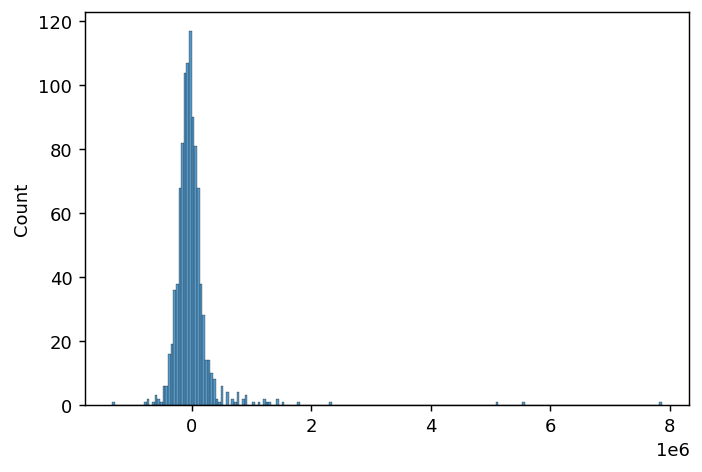

In [165]:
print(results.resid)
sbn.histplot(results.resid)

In [166]:
#Durbin-Watson test on residuals
from statsmodels.stats.stattools import durbin_watson

d = durbin_watson(results.resid)
print(d)

1.9901244947673222


#### Algoritmus vyhodnocení
(obsah této buňky převzat z >>  https://www.statology.org/durbin-watson-test-python/)

One of the assumptions of linear regression is that *there is no correlation between the residuals*. In other words, the residuals are assumed to be independent.

One way to determine if this assumption is met is to perform a **Durbin-Watson test**, which is used to detect the presence of autocorrelation in the residuals of a regression. This test uses the following hypotheses:

**H0** (null hypothesis): There is no correlation among the residuals.

**H1** (alternative hypothesis): The residuals are autocorrelated.

The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. Thus, the test statistic will always be between 0 and 4 with the following interpretation:
*   A test statistic of 2 indicates no serial correlation.
*   The closer the test statistics is to 0, the more evidence of positive serial correlation.
*   The closer the test statistics is to 4, the more evidence of negative serial correlation.

As a rule of thumb, test statistic values between the range of 1.5 and 2.5 are considered normal. However, values outside of this range could indicate that autocorrelation is a problem.

Hodnota Durbin-Watsonova testu je velmi blízká k 2, tedy lze usoudit, že v datech není korelace mezi reziduemi.

OLS tedy OK.

### VIF = variance inflation factor

In [167]:
# VIF = variance inflation factor
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# pomoci patsy.dmatrices "rozlozim" dataset na vektor vysvetlovane promenne 'price' a matici vysvetlujicich promennych
#     formula je stejna, jako v modelu OLS v bunce na zacatku reseni otazky 4 (tj. vsechny promenne, ktere jsou v datasetu)
y, X_mtx = dmatrices(formula_like = "price ~ bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated", data = data[data.split == "train"], return_type = 'dataframe')

# vypocet VIF pro kazdou vysvetlujici promennou
df_vif = pd.DataFrame()
df_vif['VIF'] = [variance_inflation_factor(X_mtx.values, i) for i in range(X_mtx.shape[1])]
df_vif['variable'] = X_mtx.columns

df_vif


,VIF,variable
0,8141.319272,Intercept
1,1.736176,bedrooms
2,2.897753,bathrooms
3,15848.703812,sqft_living
4,1.085697,sqft_lot
5,1.722118,floors
6,1.356679,waterfront
7,1.639189,view
8,1.243794,condition
9,268.729102,grade


#### Algoritmus vyhodnocení
(obsah této buňky převzat z >> https://www.statology.org/how-to-calculate-vif-in-python/)

**How to Interpret VIF Values**

*Note:* Ignore the VIF for the “Intercept” in the model since this value is irrelevant.


The value for VIF starts at 1 and has no upper limit. A general rule of thumb for interpreting VIFs is as follows:

*   A value of 1 indicates there is **no correlation** between a given explanatory variable and any other explanatory variables in the model.
*   A value between 1 and 5 indicates **moderate correlation** between a given explanatory variable and other explanatory variables in the model, but this is often not severe enough to require attention.
*   A value greater than 5 indicates **potentially severe correlation** between a given explanatory variable and other explanatory variables in the model. In this case, the coefficient estimates and p-values in the regression output are likely unreliable.


Podle výsledku výše je vidět, že následující proměnné jsou silně kolineární:

```
sqft_living, grade, sqft_above, sqft_basement 
```
Je samozřejmé, že celkové plochy domů a plochy jejich určitých částí spolu souvisí. Pro vysokou hodnotu VIF pro proměnnou grade nemám vysvětlení.


Proměnná yr_built je také kolineární. Je možné to vysvětlit přítomností proměnné yr_renovated. Ale VIF vyšel kolem 2 a tedy obě proměnné lze ponechat.


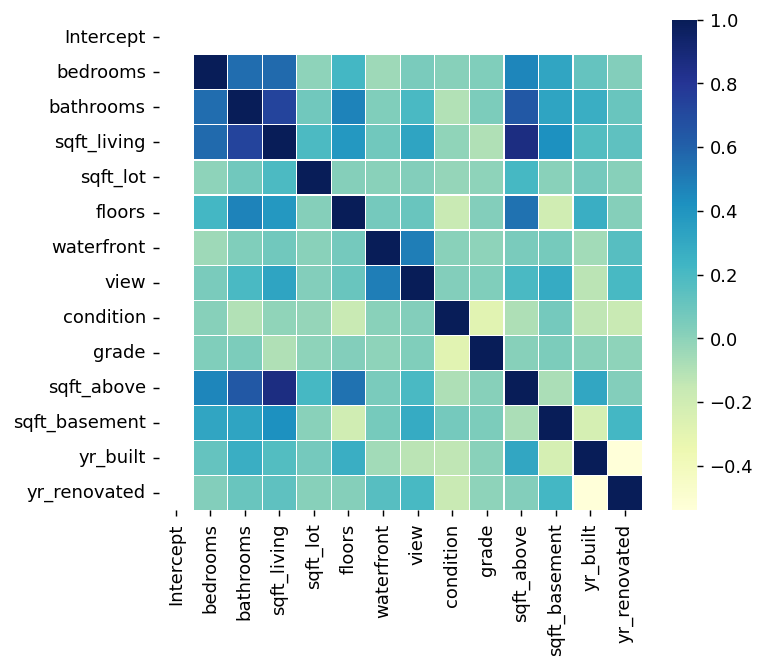

In [168]:
# multikolinearita v datasetu POMOCI 'HEATMAP'
#corrmat = data.corr()   # na celem datasetu
corrmat = X_mtx.corr()   # na matici X_mtx sestavene vyse pomoci patsy.dmatrices

fig_heat_all_vars, ax = plt.subplots(figsize =(6, 5))
sbn.heatmap(corrmat, ax = ax,cmap ="YlGnBu", linewidths = 0.1)

In [169]:
# cislo podminenosti matice regresoru (cely dataset krome 'price')
kappa_all_vars = np.linalg.cond(X_mtx)
print(kappa_all_vars)

4298120.278697279


#### **Závěr:** 




* Otázka 05
    
  Pouze pomocí trénovacích dat (tj., split == "train") a všech vybranných proměnných najděte vhodný lineární regresní model, který má za úkol predikovat co nejlépe cenu, tj. minimalizovat střední kvadratickou chybu (MSE). U výsledného modelu porovnejte VIF a Kappa s původní celkovou maticí regresorů.
  



In [170]:
# OLS na promennych, ktere jsme ponechali na zaklade hodnot VIF. Dataset v TRENOVACI sekci (OLS bez interakci)
model_selected_vars = sm.ols(formula = "price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + yr_built + yr_renovated", data = data[data.split == "train"])
results_selected_vars = model_selected_vars.fit()

print(results_selected_vars.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     38.89
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           1.01e-64
Time:                        16:25:30   Log-Likelihood:                -14439.
No. Observations:                1000   AIC:                         2.890e+04
Df Residuals:                     989   BIC:                         2.895e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      3.43e+06   1.26e+06      2.720   

In [171]:
# v teto bunce model pouze pro testovani, zkousel jsem, ktere promenne maji vliv na hodnoty statistik R2 a F. Dale toto nepouzivam.
model_sel2 = sm.ols(formula = "price ~ sqft_living + sqft_lot + floors + waterfront + view + condition", data = data[data.split == "train"])
results_sel2 = model_sel2.fit()

print(results_sel2.summary())
# nepodstatne

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     59.33
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           7.54e-63
Time:                        16:25:30   Log-Likelihood:                -14452.
No. Observations:                1000   AIC:                         2.892e+04
Df Residuals:                     993   BIC:                         2.895e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.114e+04   9.55e+04     -0.221      

In [172]:
# vypocet VIF pro dataset, ze ktereho jsme uz vyhodili promenne, ktere meli problem s kolinearitou
y_selected_vars, X_mtx_selected_vars = dmatrices(formula_like = "price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + yr_built + yr_renovated", data = data[data.split == "train"], return_type = 'dataframe')

df_vif_selected_vars = pd.DataFrame()
df_vif_selected_vars['VIF'] = [variance_inflation_factor(X_mtx_selected_vars.values, i) for i in range(X_mtx_selected_vars.shape[1])]
df_vif_selected_vars['variable'] = X_mtx_selected_vars.columns
df_vif_selected_vars

,VIF,variable
0,7719.363767,Intercept
1,1.671278,bedrooms
2,2.715218,bathrooms
3,2.776306,sqft_living
4,1.075371,sqft_lot
5,1.371249,floors
6,1.352330,waterfront
7,1.548253,view
8,1.141579,condition
9,1.876635,yr_built


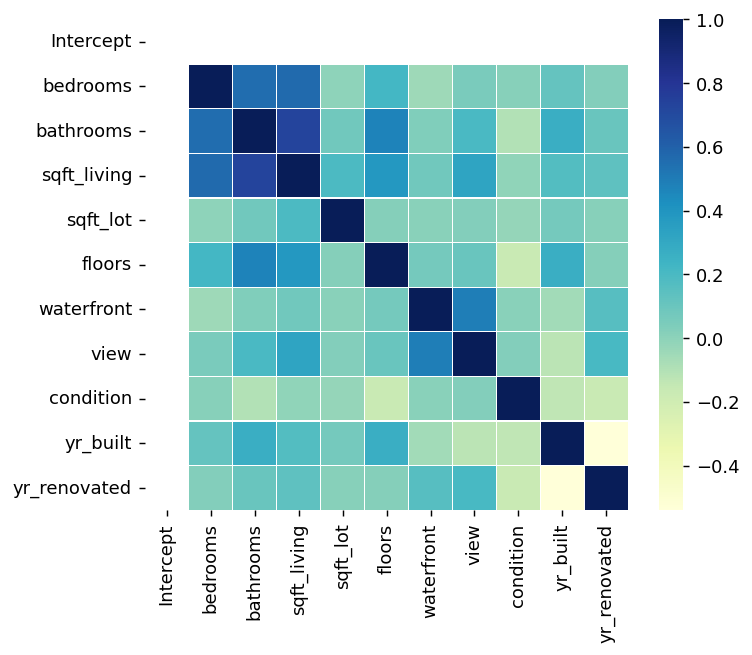

In [173]:
# multikolinearita v datasetu POMOCI 'HEATMAP'
#corrmat = data.corr()   # na celem datasetu
corrmat_selected_vars = X_mtx_selected_vars.corr()   # na matici X_mtx sestavene vyse pomoci patsy.dmatrices

fig_heat_selected_vars, ax = plt.subplots(figsize =(6, 5))
sbn.heatmap(corrmat_selected_vars, ax = ax,cmap ="YlGnBu", linewidths = 0.1)

In [174]:
kappa_selected_vars = np.linalg.cond(X_mtx_selected_vars)
print(kappa_selected_vars)

4184641.7260549082


In [175]:
kappa_all_vars - kappa_selected_vars

113478.55264237104

Číslo podmíněnosti se zmenšilo, tzn. máme "lepší" matici, a šanci sestrojit přesnější model.

* Otázka 06

   Pro Vámi vybraný model z předešlé otázky spočtěte příslušné infulenční míry. Uveďtě id pro 20 pozorování s největší hodnotou DIFF, největší hodnotou leverage (hatvalues) a největší hodnotou Cookovy vzdálenosti. (tj, 3 krát 20 hodnot). Jaká pozorování považujete za vlivná a odlehlá pozorování.


In [176]:
infl = results_selected_vars.get_influence()  
#infl.plot_influence()
infl_df = infl.summary_frame()     # returns a dataframe
print(infl_df.describe())

       dfb_Intercept  dfb_bedrooms  dfb_bathrooms  dfb_sqft_living  \
count    1000.000000   1000.000000    1000.000000      1000.000000   
mean       -0.000044     -0.000008       0.000084        -0.000193   
std         0.024265      0.023074       0.027345         0.044591   
min        -0.336721     -0.145756      -0.158456        -0.750854   
25%        -0.004461     -0.004689      -0.005156        -0.003489   
50%         0.000280      0.000154      -0.000111         0.000001   
75%         0.006124      0.005155       0.004773         0.004317   
max         0.206593      0.213349       0.359818         0.342695   

       dfb_sqft_lot   dfb_floors  dfb_waterfront     dfb_view  dfb_condition  \
count   1000.000000  1000.000000     1000.000000  1000.000000    1000.000000   
mean       0.000102     0.000162       -0.000017    -0.000046       0.000278   
std        0.025163     0.058512        0.038478     0.030287       0.066570   
min       -0.189214    -0.252561       -0.400513 

In [177]:
# pridam 'id' z dataframu s daty do dataframu s influence measures
infl_df['id'] = data[data.split == "train"].id

In [178]:
# id pozorovani s nejvetsi hodnotou DFFITS
print("ids are >>")
print(infl_df.nlargest(20, ['dffits']).id.to_numpy()) 
print("values of DFFITS are >>")
print(infl_df.nlargest(20, ['dffits']).dffits.to_numpy())  

ids are >>
[100 200 300 500 993 826 107 508 763  62 458 127 400 946 324 774 897 357
 581 918]
values of DFFITS are >>
[2.34135103 1.7020616  1.41630624 1.15251706 0.65680017 0.64989361
 0.54102907 0.48252337 0.46838411 0.42318963 0.38668133 0.34339542
 0.34124363 0.33916676 0.3305257  0.3277956  0.32400258 0.3221498
 0.31522964 0.31108536]


In [179]:
# id pozorovani s nejvetsi hodnotou Leverage (hatvalues)
print("ids are >>")
print(infl_df.nlargest(20, ['hat_diag']).id.to_numpy()) 
print("values of hat_diag are >>")
print(infl_df.nlargest(20, ['hat_diag']).hat_diag.to_numpy())  

ids are >>
[993 222 779 815 357 851 581 897 967 107 826  63 681 536 258 563 524 820
 566  84]
values of hat_diag are >>
[0.21006447 0.12605203 0.12421142 0.07660716 0.05963591 0.05943652
 0.05926287 0.05875977 0.05731486 0.05711803 0.05674433 0.05652896
 0.05570044 0.05553965 0.0548066  0.05474709 0.05451221 0.05430925
 0.05430155 0.05428612]


In [180]:
# id pozorovani s nejvetsi hodnotou Cook's distance
print("ids are >>")
print(infl_df.nlargest(20, ['cooks_d']).id.to_numpy()) 
print("values of cooks_d are >>")
print(infl_df.nlargest(20, ['cooks_d']).cooks_d.to_numpy())  

ids are >>
[100 200 300 500 993 826 107 820 508 763 967  62 458 566 127 946 400 324
 774 897]
values of cooks_d are >>
[0.34043047 0.2225337  0.15903245 0.11471367 0.03919229 0.03816418
 0.02650752 0.02238995 0.02093685 0.01970928 0.01742247 0.01620061
 0.01343944 0.01282823 0.0106759  0.01041731 0.01041713 0.00987441
 0.00973855 0.00953685]


Na základě výsledků v buňkách výše (tři předchozí buňky):

*   pozorování s id = [100, 200, 300, 500] mají výrazně větší hodnoty `dffits` a `cooks_d` než ostatní pozorování. (Zároveň čísla indexů `id` jsou dost nápadná...)
*   pozorování s id = [993, 222, 779] mají výrazně větší hodnoty `hat_diag` (leverage values). Pravděpodobně se jedná o přirozené outliery (a tedy ponechal bych je v datasetu.) 



* Otázka 07

  Validujte model pomocí grafického znázornění reziduí (Residual vs Fitted, QQ-plot, Cookova vzdálenost, Leverages, ...).
  Identifikovali jste na základě této a předchozí otázky v datech nějaká podezřelá pozorování, která mohla vzniknout při úpravě (přepisu) datasetu? Doporučili byste tato pozorování z dat odstranit?

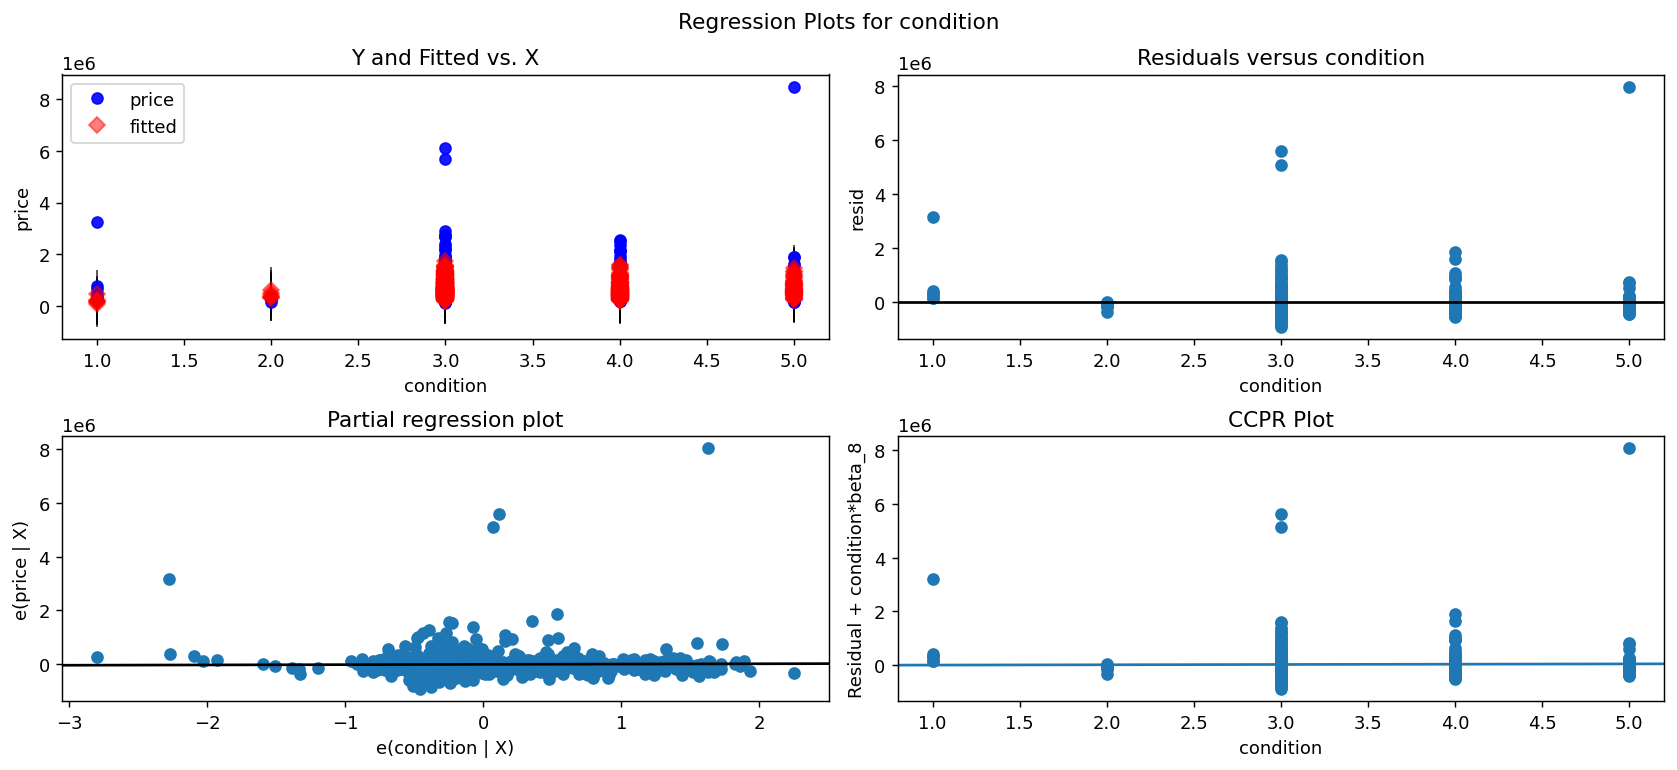

In [181]:
# modify figure size
fig = plt.figure(figsize=(13, 6))
  
# creating regression plots
#fig = statsmodels.graphics.plot_regress_exog(model_selected_vars, 'price', fig=fig)
fig = statsmodels.graphics.regressionplots.plot_regress_exog(results_selected_vars, 'condition', fig=fig)  # viz >> https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html#Single-Variable-Regression-Diagnostics
plt.show()

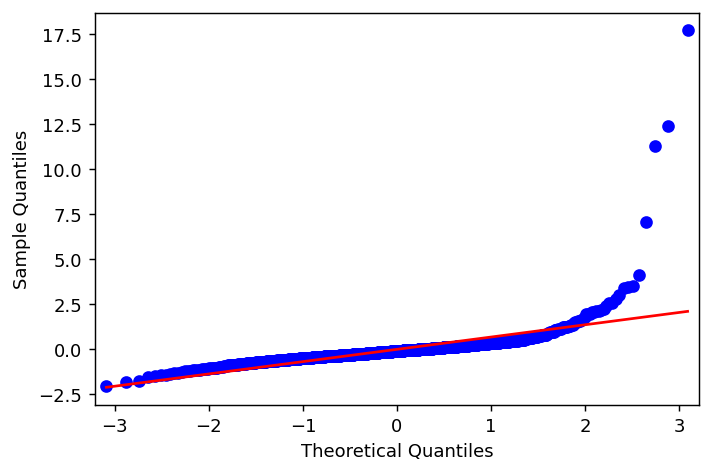

In [182]:
# QQ plot
import statsmodels.api
fig_qq_plot = statsmodels.api.qqplot(results_selected_vars.resid, line = 'r', fit=True)
plt.show()

Z obrázků výše je vidět, že čtyři hodnoty jsou jasně "mimo model".
Jedná se nejspíš o pozorování, která nám byla podezřelá už v závěru předchozí otázky (otázka 6).

## Train, test, validation ...:  (možno vynechat pokud si jste jisti počtem bodů na zápočet)

* Otázka 08

  Pokud jste se rozhodli z dat odstranit nějaká pozorování, tak dále pracujtes s vyfiltrovaným datasetem a přetrénujte model z otázky 5. A spočtěte pro tento model $R^2$ statistiku a MSE jak na trénovacích tak testovacích datech (split == "test"). 

In [184]:
# zahodime pozorovani, ktera jsme nasli v predchozichdvou otazkach, tedy:
#dataframe.drop('index_label')
data_cut = data[data.split == "train"]
print(data_cut)
data_cut = data_cut.drop([100-1, 200-1, 300-1, 500-1]) # drop funguje pouze na indexy. indexace tohoto df se lisi od nasi promenne 'id' o jednicku (specifika Pandas, indexuje od 0).
#                                                         slo bz to resit i elegantneji, zde ale nestoji za to
print(data_cut)

     Unnamed: 0    id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0             1     1  2395000.0         4       3.25         3800     19798   
1             2     2   679000.0         3       2.50         2770      9350   
2             3     3   664000.0         2       1.75         1720      5785   
3             4     4   915000.0         5       2.50         2750      5589   
4             5     5   450000.0         5       2.50         2850    209523   
..          ...   ...        ...       ...        ...          ...       ...   
995         996   996   319500.0         3       1.00         1190      8450   
996         997   997   900000.0         3       3.00         2990     30869   
997         998   998   542000.0         3       1.75         1070      8030   
998         999   999   765000.0         4       2.25         2030      2222   
999        1000  1000   440000.0         3       1.00          105      7500   

     floors  waterfront  view  conditio

In [185]:
model_cut = sm.ols(formula = "price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + yr_built + yr_renovated", data = data_cut)
results_cut = model_cut.fit()

print(results_cut.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     124.7
Date:                Tue, 03 Jan 2023   Prob (F-statistic):          2.92e-167
Time:                        16:32:50   Log-Likelihood:                -13854.
No. Observations:                 996   AIC:                         2.773e+04
Df Residuals:                     985   BIC:                         2.778e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.036e+06   7.43e+05      5.432   

In [186]:
# pro porovnani:
print(results_selected_vars.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     38.89
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           1.01e-64
Time:                        16:33:33   Log-Likelihood:                -14439.
No. Observations:                1000   AIC:                         2.890e+04
Df Residuals:                     989   BIC:                         2.895e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      3.43e+06   1.26e+06      2.720   

In [ ]:
# vizualne:
sbn.lmplot(   , legend=True)

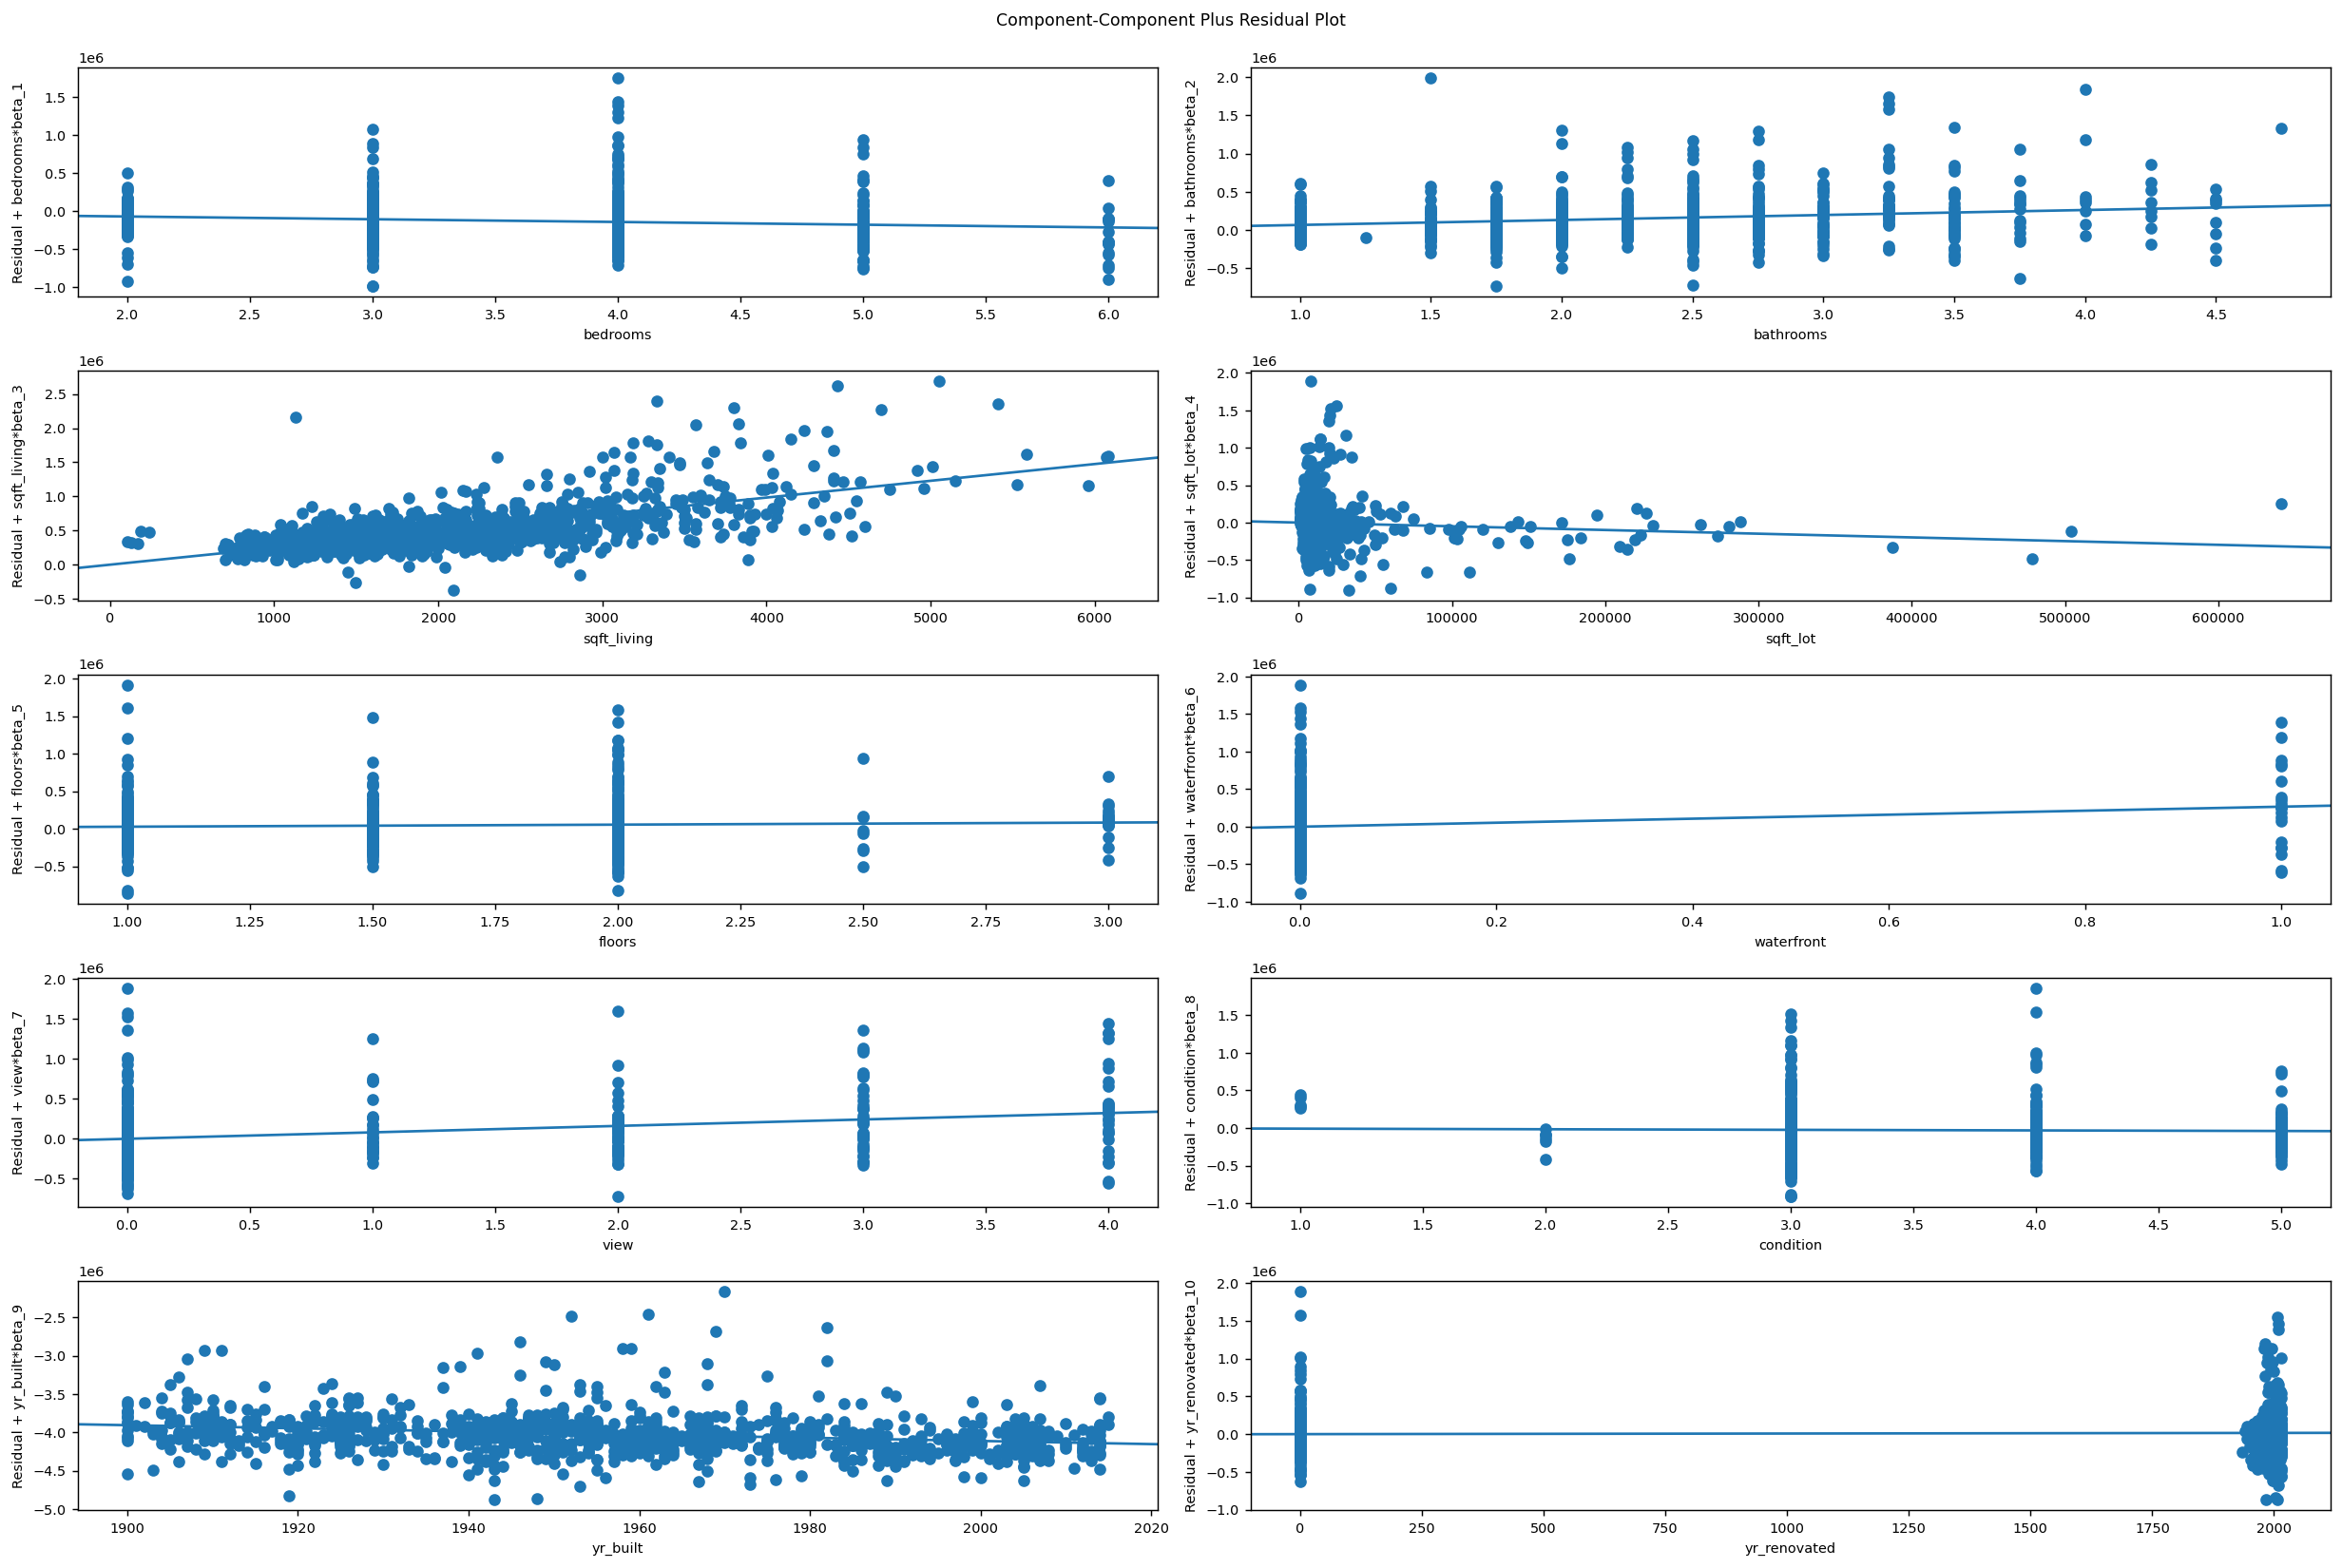

In [214]:
plt.rc("figure", figsize=(19, 15))
plt.rc("font", size=8)
fig_ols_cut = statsmodels.api.graphics.plot_ccpr_grid(results_cut)
plt.show()

* Otázka 09

  Pomocí hřebenové regrese (případně pomocí LASSO a Elastic Net) zkuste najít nejlepší hyperparametr(y) tak, aby výsledný model měl co nejmenší MSE na testovacích datech.  

* Otázka 10

  Vyberte výsledný model a porovnejte MSE a $R^2$ na trénovacích, testovacích a validačních datech. Co z těchto hodnot usuzujete o kvalitě modelu a případném přetrénování? Je váš model vhodný pro predikci cen nemovitostí v okolí King County? Pokud ano, má tato predikce nějaká omezeni?

# KONEC UKOLU.

In [ ]:
# code backups below....

In [ ]:
# statistické testy FOR GRADE

#Kruskal-Wallis test
# H_0: distributions of all samples are equal
# H_1: distributions of some samples are not equal

data1 = [1,2,3, 0, 0.1, 0.1, 0.1, 0.1]
data2 = [5000, 20000,3,1,1000, 2000]
stat, p = scp.stats.kruskal(data1, data2)

print(p)
if p > 0.01:
    print("probably same distribution")
else:
    print("probably diferent distributions")


0.0060040152037075
probably diferent distributions


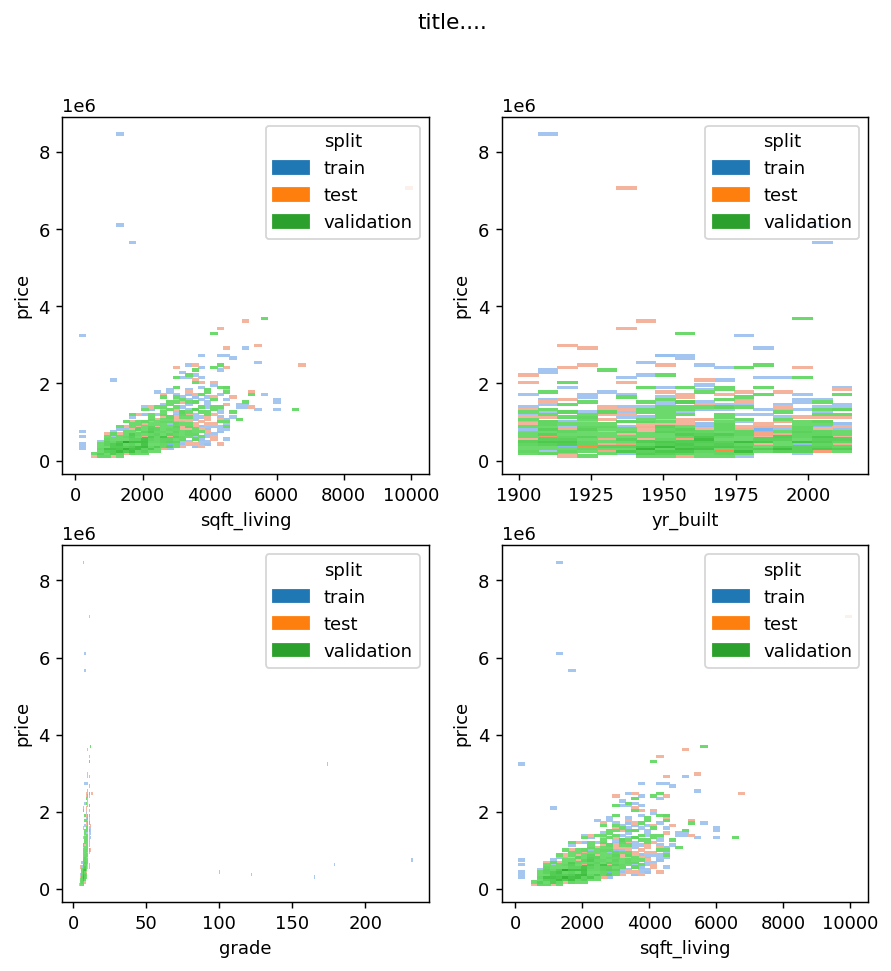

In [ ]:
# vykreslit 4 subploty, v kazdem histplot o trech barvach

fig, axs = plt.subplots(2, 2, figsize =(8, 8))
sbn.histplot( x = "sqft_living", y = "price", hue = "split", data = data  , ax = axs[0,0])
sbn.histplot( x = "grade", y = "price", hue = "split", data = data , ax = axs[1,0])
sbn.histplot( x = "yr_built", y = "price", hue = "split", data = data , ax = axs[0,1])
sbn.histplot( x = "sqft_living", y = "price", hue = "split", data = data , ax = axs[1,1])

fig.suptitle("title....")
fig.show()

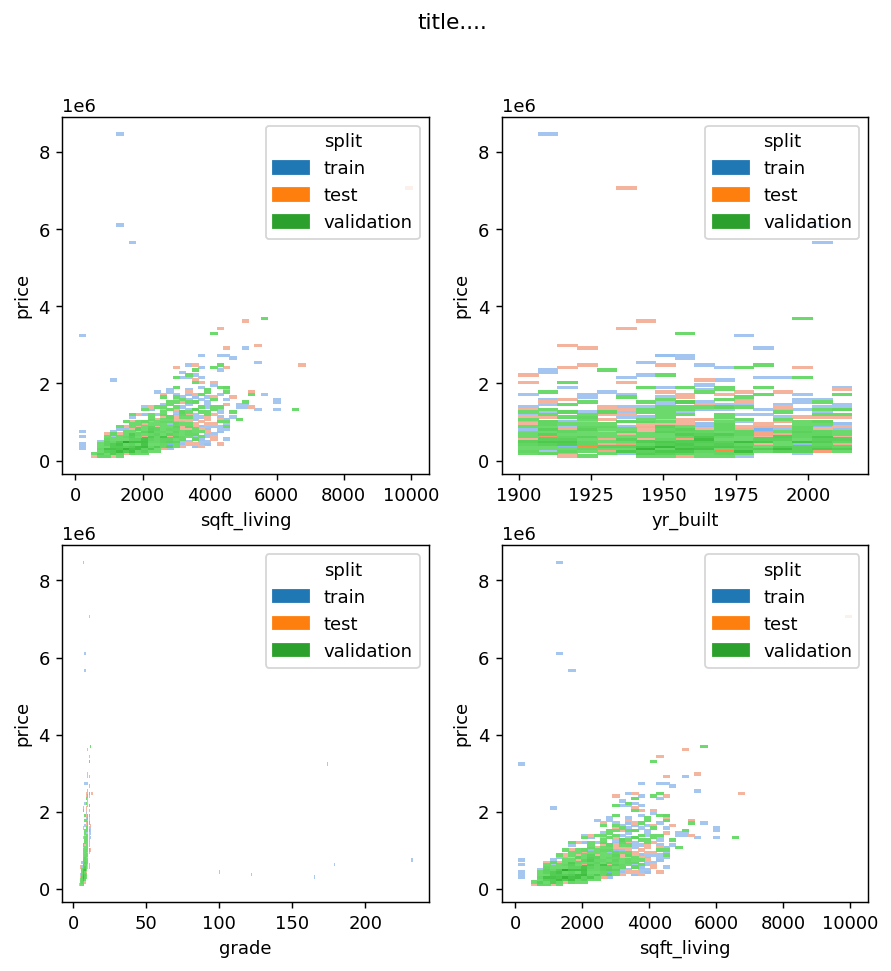

In [ ]:
# vykreslit 4 subploty, v kazdem histplot o trech barvach

fig, axs = plt.subplots(2, 2, figsize =(8, 8))
sbn.histplot( x = "sqft_living", y = "price", hue = "split", data = data , kde = True , ax = axs[0,0])
sbn.histplot( x = "grade", y = "price", hue = "split", data = data , ax = axs[1,0])
sbn.histplot( x = "yr_built", y = "price", hue = "split", data = data , ax = axs[0,1])
sbn.histplot( x = "sqft_living", y = "price", hue = "split", data = data , ax = axs[1,1])

fig.suptitle("title....")
fig.show()

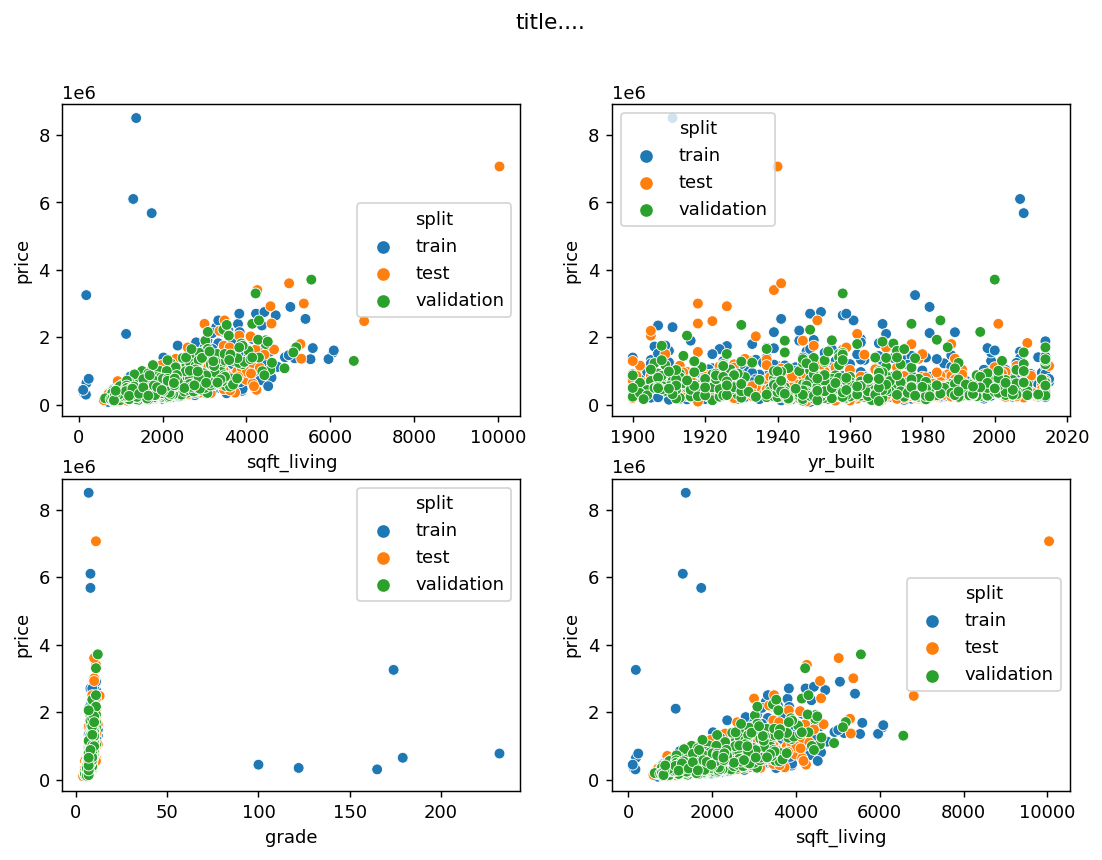

In [ ]:
# vykreslit 4 subploty, v kazdem scatterplot o trech barvach

fig, axs = plt.subplots(2, 2, figsize =(10, 7))
sbn.scatterplot( x = "sqft_living", y = "price", hue = "split", data = data , ax = axs[0,0])
sbn.scatterplot( x = "grade", y = "price", hue = "split", data = data , ax = axs[1,0])
sbn.scatterplot( x = "yr_built", y = "price", hue = "split", data = data , ax = axs[0,1])
sbn.scatterplot( x = "sqft_living", y = "price", hue = "split", data = data , ax = axs[1,1])

fig.suptitle("title....")
fig.show()

Soudě podle grafů výše trénovací data (split == train) obsahují mnohem víc outlierů. Validační data (split == validation) se naopak skoro pokaždé shlukují do jednoho místa.


In [ ]:
# id pozorovani s nejvetsi hodnotou Cook's distance
print(infl_df.nlargest(20, ['cooks_d']).id)
# pozn.: id jsou ve DRUHEM sloupci, prvni sloupec je pouze vnitrni cislovani radku (a je oproti 'id' posunuto o 1, protoze pandas cisluje od 0)

99     100
199    200
299    300
499    500
992    993
825    826
106    107
819    820
507    508
762    763
966    967
61      62
457    458
565    566
126    127
945    946
399    400
323    324
773    774
896    897
Name: id, dtype: int64
